<a href="https://colab.research.google.com/github/EarlyOcean/PCD_Assignment02/blob/main/PCD_Assignment02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

Citra yang digunakan pada notebook ini tersimpan di dalam repositori github 'PCD_Assignment02'. Fungsi 'show_image' berfungsi untuk menampilkan citra dalam ukuran yang sudah ditetapkan sehingga enak untuk dilihat.

In [37]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

!rm -rf PCD_Assignment02
!git clone https://github.com/EarlyOcean/PCD_Assignment02

# all processed images will be displayed with this value
display_width, display_height = 400, 300
def show_image(image):
  resized_image = cv2.resize(image, (display_width, display_height), interpolation=cv2.INTER_NEAREST)
  cv2_imshow(resized_image)

Cloning into 'PCD_Assignment02'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 26 (delta 6), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (26/26), 24.62 KiB | 3.52 MiB/s, done.
Resolving deltas: 100% (6/6), done.


# Image Enhancement for Low Contrast Image


Notebook ini akan membahas metode image enhancement yang digunakan untuk meningkatkan kualitas citra yang memiliki kontras rendah. Kontras rendah merupakan masalah yang umum pada citra digital yang disebabkan oleh perbedaan intensitas pixel yang tidak begitu besar. Citra bangunan berikut adalah contoh dari citra dengan kontras rendah dan menjadi citra yang akan kita tingkatkan kualitasnya menggunakan image enhancement.

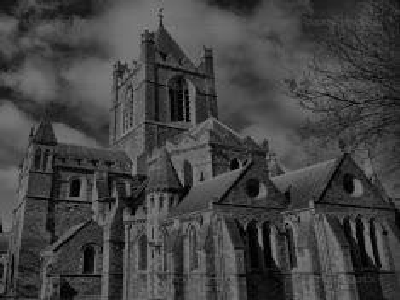

In [24]:
# original image
original_img = cv2.cvtColor(cv2.imread("/content/PCD_Assignment02/low_contrast.png"), cv2.COLOR_BGR2GRAY)

show_image(original_img)

Kontras rendah dapat berakibat pada pemrosesan citra tahap berikutnya, terutama fitur-fitur pada citra yang akan lebih sulit dibedakan. Oleh karena itu, perlu dilakukan image enhancement pada citra untuk setidaknya memperjelas kontras/perbedaan intensitas antar pixel. Terdapat banyak metode yang dapat digunakan untuk meningkatkan kontras suatu citra, tetapi pada notebook ini kita hanya akan mencoba mengimplementasikan dua diantaranya, yaitu 1. Histogram Equalization dan 2. Contrast Stretching. Pada bagian akhir juga akan terdapat pembahasan singkat mengenai perbedaan antara kedua metode dan mana (jika ada) yang lebih baik untuk digunakan.

# 1st Method: Histogram Equalization

Metode yang akan kita lihat pertama adalah histogram equalization. Metode ini melakukan penyebaran terhadap histogram citra awal berdasarkan cumulative distribution function (cdf), seperti yang diimplementasikan pada kode berikut.

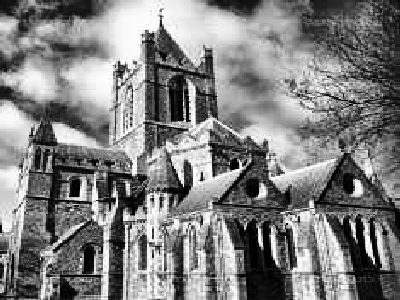

In [27]:
# Implementation of histogram equalization

# Calculate the image's histogram
hist = cv2.calcHist([original_img], [0], None, [256], [0, 256])

# Calculate the cumulative distribution function (CDF)
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

# Mask zero values to avoid division by zero
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
cdf = np.ma.filled(cdf_m, 0).astype('uint8')

# Apply the transformation
equalized_img = cdf[original_img]

# Display the enhanced image
show_image(equalized_img)

Pada citra di atas, kontras antar pixel lebih jelas sehingga kita dapat membedakan fitur-fitur dari gambar bangunan dengan lebih seksama. Berikut perbandingan dari histogram pada citra awal dengan citra yang sudah ditingkatkan, dapat terlihat bahwa histogram citra yang sudah ditingkatkan memiliki nilai yang lebih tersebar.

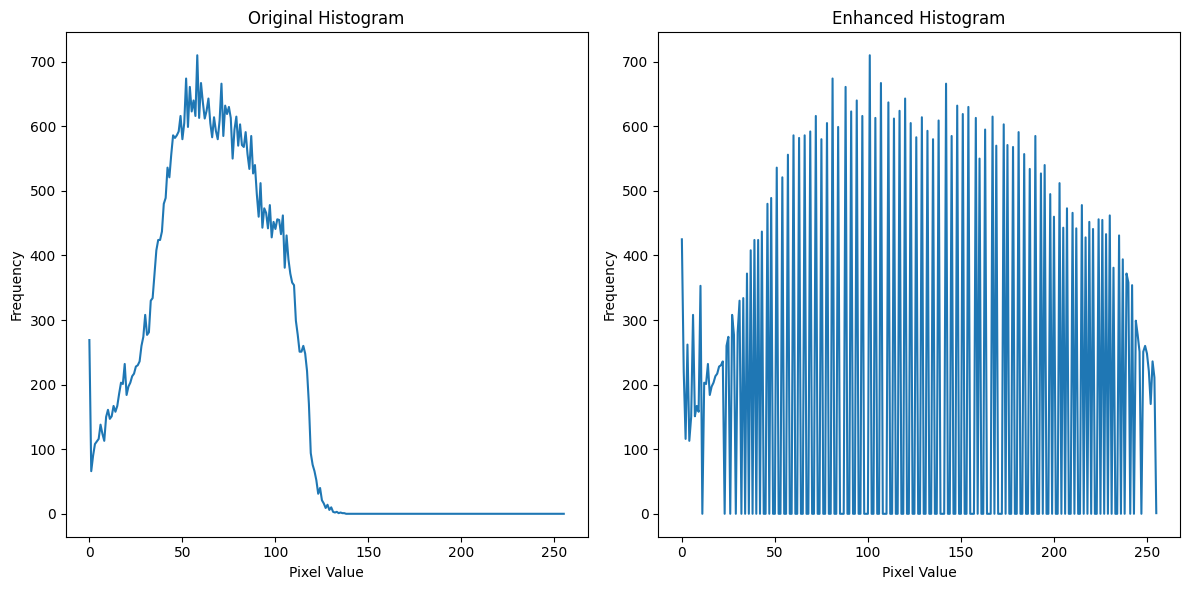

In [42]:
# Plot the histograms of the original and enhanced images

# Calculate the histogram of the enhanced image
hist_equalized = cv2.calcHist([equalized_img], [0], None, [256], [0, 256])

# Plotting
plt.figure(figsize=(12, 6))

# Original histogram
plt.subplot(1, 2, 1)
plt.plot(hist)
plt.title('Original Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Enhanced histogram
plt.subplot(1, 2, 2)
plt.plot(hist_equalized)
plt.title('Enhanced Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 2nd Method: Contrast Stretching

Selain metode histogram equalization, citra dengan kontras rendah juga dapat ditingkatkan dengan metode kedua yaitu contrast stretching. Metode ini pada dasarnya melakukan interpolasi nilai seluruh pixel pada citra asli ke dalam rentang 0-255 dengan mempertimbangkan nilai minimum dan maksimum pixel pada citra awal. Berikut kode yang mengimplementasikan metode contrast stretching.

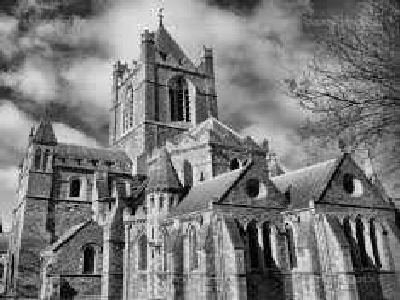

In [35]:
# Implementation of contrast stretching

# Find the minimum and maximum pixel values
min_val = np.min(original_img)
max_val = np.max(original_img)

# Apply contrast stretching formula
stretched_img = ((original_img - min_val) / (max_val - min_val)) * 255

# Clip values to be within the valid range [0, 255]
stretched_img = np.clip(stretched_img, 0, 255).astype(np.uint8)

# Display the enhanced image
show_image(stretched_img)

Bila diperhatikan, hasil citra dari metode contrast stretching berbeda dengan metode sebelumnya, yaitu dalam hal ke-ekstrimen intensitas pixel. Pada hasil citra sebelumnya, terdapat banyak pixel yang benar2 gelap (hitam) seperti halnya banyak pixel yang benar2 terang (putih) sedangkan perbedaan intensitas pixel pada hasil citra kedua tidak begitu ekstrim (tetapi kontrasnya masih jelas). Untuk lebih jelasnya, kita dapat melihat histogram untuk hasil citra kedua sebagai berikut.

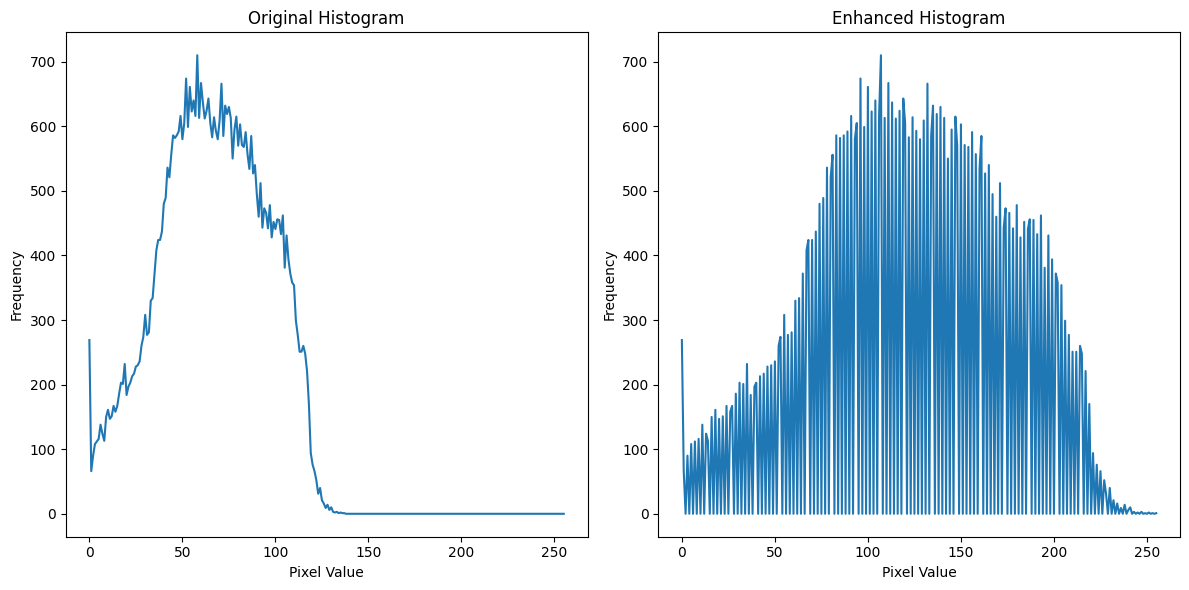

In [43]:
# Plot the histograms of the original and enhanced images

# Calculate the histogram of the enhanced image
hist_stretched = cv2.calcHist([stretched_img], [0], None, [256], [0, 256])

# Plotting
plt.figure(figsize=(12, 6))

# Original histogram
plt.subplot(1, 2, 1)
plt.plot(hist)
plt.title('Original Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Enhanced histogram
plt.subplot(1, 2, 2)
plt.plot(hist_stretched)
plt.title('Enhanced Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Quick Analysis and Conclusion


Seperti yang ditemukan sebelumnya, peningkatan citra menggunakan metode histogram equalization menghasilkan intensitas pixel yang cenderung lebih ekstrim dibandingkan contrast stretching. Kode berikut menampilkan kembali hasil citra yang telah ditingkatkan oleh kedua metode tersebut, beserta perbandingan histogramnya.

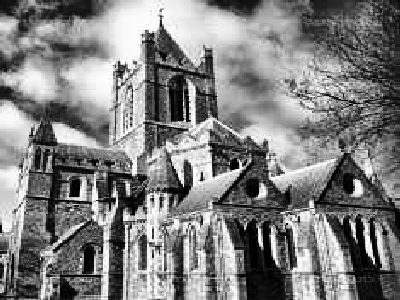

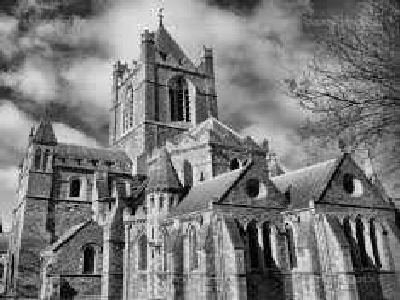

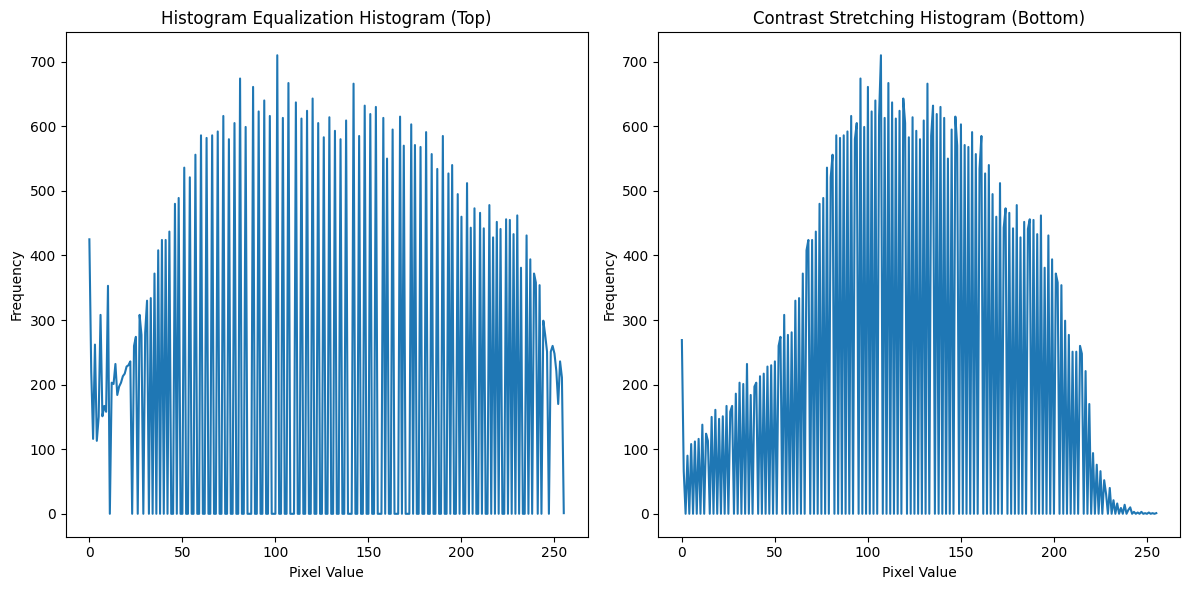

In [45]:
# histogram equalization (top)
# contrast stretching (bottom)

show_image(equalized_img)
show_image(stretched_img)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(hist_equalized)
plt.title('Histogram Equalization Histogram (Top)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.plot(hist_stretched)
plt.title('Contrast Stretching Histogram (Bottom)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Dapat terlihat pada perbandingan kedua histogram, terdapat lebih banya pixel dengan nilai 0 (hitam) maupun 250+ (putih) pada histogram metode pertama dibandingkan metode kedua. Hal ini disebabkan oleh kecenderungan cdf yang digunakan pada metode pertama untuk meratakan puncak histogram, yang berakibat pada lebih banyak nilai yang tergeser ke sisi ekstrim kiri dan kanan. Sementara itu, metode kedua menggunakan fungsi interpolasi yang bersifat linear, sehingga nilai ekstrim hanya akan dimiliki oleh pixel yang intensitas awalnya paling besar atau paling kecil. Selain itu, dari sisi komputasi metode pertama sedikit lebih berat dibandingkan metode kedua karena melibatkan kalkulasi cdf dan remapping pixel. Namun demikian, efek tersebut tidak begitu berpengaruh pada notebook ini, dimana kedua metode hanya memakan waktu 0s untuk dieksekusi.

Secara keseluruhan, kedua metode yang telah kita cermati di atas, baik histogram equalization maupun contrast stretching, mampu melakukan tugasnya dengan baik, yaitu meningkatkan kontras suatu citra yang semula rendah. Beberapa pertimbangan dapat dilakukan untuk kasus-kasus yang lebih spesifik, seperti apakah kita menginginkan hasil citra yang lebih tajam (perbedaan intensitasnya lebih ekstrim) atau adakah faktor limitasi pada segi komputasi, dimana kita dapat memilih untuk menggunakan satu dari dua metode tersebut yang lebih sesuai pada kasus yang kita tangani.